# General solution for the Zee model
Based in the Mathematica notebook analysis in:
...
## Definitions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd
import hep as hp
def Kappa(s2phi,M1,M2):
    return s2phi*np.log(M2**2/float(M1)**2)/(4.*np.pi)**2 # avoid integer division

def Inverse_Zee_Matrix(kappa,ml,IH=False,sgnm2=-1,sgnml=1):
    """Inverse neutrino mass matrix normalized by kappa from
        Mnu_diag=U^T.(kappa Y).U
        ,
        (Inverse_Zee_Matrix) = U. Mnu_diag.U^T/kappa
        sgnm2=-1 guarantees real Yukawa couplings
        
    requires hep.py:
       https://github.com/restrepo/BSM-Toolbox/blob/master/tests/hep.py
    """
    if not IH:
        mltmp,Dm21_2,Dm3l_2,theta12,theta23,theta13,delta=hp.neutrino_data()
        U=hp.UPMNS(theta12[1],theta13[1],theta23[1])
        m1=ml; m2=sgnm2*np.sqrt(Dm21_2[1]+m1**2); m3=sgnml*np.sqrt(Dm3l_2[1]+m1**2)
    else:
        mltmp,Dm21_2,Dm3l_2,theta12,theta23,theta13,delta=hp.neutrino_data(IH=True)
        U=hp.UPMNS(theta12[1],theta13[1],theta23[1])
        #DEBUG signs
        m3=ml; m2=sgnm2*np.sqrt(Dm3l_2[1]-m3**2); m1=signml*np.sqrt(Dm21_2[1]-m2**2)
        
    return np.dot( np.dot( U,np.diag([m1,m2,m3]) ), U.transpose() )/kappa

def get_yukawas(X,q01=1e-3,q02=1e-6,q10=200e-3,q12=0,q21=-1e-5,q22=0,m_e=0.5109989461e-3,m_mu=0.1056583745,m_tau=1.77686,):
    """
    Get the O and f full Yukawa mass matrices which define the neutrino mass matrix in the Zee model
      Mnu=kappa*(O.M_lep.f^T+f.M_lep.O^T)
    where M_lep is the diagonal matrix with the charged leptons
    
    The input X is the output of the `def Inverse_Zee_Matrix(...)` in this module
    """
    import numpy.lib.scimath as sc # .sqrt -> returns complex for sqrt(negative real)
    ml=np.array([m_e,m_mu,m_tau])
    Q=np.zeros((3,3))
    f=np.zeros((3,3))
    Q[0,1]=q01;Q[0,2]=q02;Q[1,0]=q10;Q[1,2]=q12;Q[2,1]=q21;Q[2,2]=q22
    Q[2,0]=( -(ml[0]**3*Q[1,0]**2*X[0,0]**2*(ml[1]*Q[2,1]*X[0,1] + ml[2]*Q[0,2]*X[2,2])) -\
      ml[0]*(ml[1]*Q[2,1]*X[1,1] + ml[2]*Q[1,2]*X[2,2])*(ml[1]*Q[0,1]*((ml[1]*Q[0,1]*X[0,1] +\
      ml[2]*Q[0,2]*X[0,2])*X[1,1] + ml[2]*Q[1,2]*X[0,0]*X[1,2]) +\
      ml[2]**2*Q[0,2]*Q[1,2]*X[0,0]*X[2,2]) + ml[0]**2*Q[1,0]*X[0,0]*(-(ml[1]*Q[2,1]*((2*ml[1]*Q[0,1]*X[0,1] +\
      ml[2]*Q[0,2]*X[0,2])*X[1,1] + ml[2]*Q[1,2]*X[0,0]*X[1,2])) -\
      ml[2]*(2*ml[2]*Q[0,2]*Q[1,2]*X[0,2] + ml[1]*Q[0,1]*(Q[1,2]*X[0,1] + Q[0,2]*X[1,1]))*X[2,2]) +\
      np.sqrt( -(ml[0]**2*ml[1]**2*(ml[0]*Q[1,0]*Q[2,1]*X[0,0] + Q[0,1]*(ml[1]*Q[2,1]*X[1,1] +\
      ml[2]*Q[1,2]*X[2,2]))**2*(ml[0]**2*Q[1,0]**2*X[0,0]**2*(-X[0,1]**2 + X[0,0]*X[1,1]) +\
      ml[1]**2*Q[0,1]**2*X[1,1]**2*(-X[0,1]**2 + X[0,0]*X[1,1]) +\
      2*ml[1]*ml[2]*Q[0,1]*X[1,1]*((Q[1,2]*X[0,0] - Q[0,2]*X[0,1])*X[0,2]*X[1,1] + X[0,0]*(-(Q[1,2]*X[0,1]) +\
      Q[0,2]*X[1,1])*X[1,2]) + 2*ml[0]*Q[1,0]*X[0,0]*(X[1,1]*(ml[2]*(Q[1,2]*X[0,0] - Q[0,2]*X[0,1])*X[0,2] +\
      ml[1]*Q[0,1]*(-X[0,1]**2 + X[0,0]*X[1,1])) + ml[2]*X[0,0]*(-(Q[1,2]*X[0,1]) + Q[0,2]*X[1,1])*X[1,2]) +\
      ml[2]**2*(-(Q[0,2]*X[0,2]*X[1,1] - Q[1,2]*X[0,0]*X[1,2])**2 + X[0,0]*X[1,1]*(Q[1,2]**2*X[0,0] -\
      2*Q[0,2]*Q[1,2]*X[0,1] + Q[0,2]**2*X[1,1])*X[2,2])))    )   )/\
      (ml[0]**2*X[0,0]*((ml[0]*Q[1,0]*X[0,0] + ml[1]*Q[0,1]*X[1,1])*(ml[0]*Q[1,0]*X[0,0] +\
       2*ml[2]*Q[1,2]*X[0,2] + ml[1]*Q[0,1]*X[1,1]) + ml[2]**2*Q[1,2]**2*X[0,0]*X[2,2]))

    Q[0,0]=(ml[0]**2*Q[0,1]*Q[1,0]*Q[2,0]*X[0,0] - ml[2]*(Q[0,2]*Q[2,1] -\
        Q[0,1]*Q[2,2])*(ml[1]*Q[2,1]*X[1,1] + ml[2]*Q[1,2]*X[2,2]) +\
        ml[0]*(ml[1]*Q[0,1]**2*Q[2,0]*X[1,1] + ml[2]*(Q[1,2]*Q[2,0]*(-(Q[2,1]*X[0,0]) +\
        2*Q[0,1]*X[0,2]) + Q[1,0]*(Q[2,1]*(Q[2,2]*X[0,0] - 2*Q[0,2]*X[0,2]) +\
        Q[0,1]*Q[0,2]*X[2,2]))))/(ml[0]*(ml[0]*Q[1,0]*Q[2,1]*X[0,0] +\
        Q[0,1]*(ml[1]*Q[2,1]*X[1,1] + ml[2]*Q[1,2]*X[2,2])))
    
    Q[1,1]=(ml[0]**3*Q[1,0]*Q[2,0]*(Q[0,1]*Q[1,2]*Q[2,0] - Q[0,2]*Q[1,0]*Q[2,1])*X[0,0]**2 +\
        ml[0]*(2*ml[1]*Q[0,1]*(Q[0,1]*Q[1,2]*Q[2,0]*X[0,1] + Q[1,0]*Q[2,1]*(Q[1,2]*X[0,0] -\
        Q[0,2]*X[0,1])) + ml[2]*(Q[0,1]*Q[1,2]*Q[2,0]*Q[2,2]*X[0,0] -\
        2*Q[0,2]**2*Q[1,0]*Q[2,1]*X[0,2] + Q[0,2]*(Q[1,0]*Q[2,1]*Q[2,2]*X[0,0] +\
        2*Q[1,2]*Q[2,0]*(-(Q[2,1]*X[0,0]) + Q[0,1]*X[0,2]))))*(ml[1]*Q[2,1]*X[1,1] +\
        ml[2]*Q[1,2]*X[2,2]) + (ml[1]*Q[0,1]**2*Q[1,2] + ml[2]*Q[0,2]*(-(Q[0,2]*Q[2,1]) +\
        Q[0,1]*Q[2,2]))*(ml[1]*Q[2,1]*X[1,1] + ml[2]*Q[1,2]*X[2,2])**2 +\
        ml[0]**2*X[0,0]*(ml[1]*(Q[1,0]**2*Q[2,1]**2*(Q[1,2]*X[0,0] - 2*Q[0,2]*X[0,1]) +\
        Q[0,1]**2*Q[1,2]*Q[2,0]**2*X[1,1] + Q[0,1]*Q[1,0]*Q[2,0]*Q[2,1]*(2*Q[1,2]*X[0,1] -\
        Q[0,2]*X[1,1])) + ml[2]*(Q[1,2]**2*Q[2,0]**2*(-(Q[2,1]*X[0,0]) + 2*Q[0,1]*X[0,2]) -\
        Q[0,2]**2*Q[1,0]**2*Q[2,1]*X[2,2] + Q[1,0]*Q[1,2]*Q[2,0]*(Q[2,1]*(Q[2,2]*X[0,0] -\
        2*Q[0,2]*X[0,2]) + Q[0,1]*Q[0,2]*X[2,2]))))/\
        (ml[1]*(ml[0]*Q[1,0]*Q[2,1]*X[0,0] + Q[0,1]*(ml[1]*Q[2,1]*X[1,1] +\
         ml[2]*Q[1,2]*X[2,2]))*(ml[0]*Q[1,2]*Q[2,0]*X[0,0] + Q[0,2]*(ml[1]*Q[2,1]*X[1,1] +\
         ml[2]*Q[1,2]*X[2,2])))    
        
    f[0,1]=(ml[0]*Q[1,2]*Q[2,0]*X[0,0] + ml[1]*Q[0,2]*Q[2,1]*X[1,1] + ml[2]*Q[0,2]*Q[1,2]*X[2,2])/\
       (2*ml[0]*ml[1]*Q[0,1]*Q[1,2]*Q[2,0] - 2*ml[0]*ml[1]*Q[0,2]*Q[1,0]*Q[2,1])
    f[0,2]=-((ml[0]*Q[1,0]*Q[2,1]*X[0,0] + ml[1]*Q[0,1]*Q[2,1]*X[1,1] + ml[2]*Q[0,1]*Q[1,2]*X[2,2])/\
        (2*ml[0]*ml[2]*Q[0,1]*Q[1,2]*Q[2,0] - 2*ml[0]*ml[2]*Q[0,2]*Q[1,0]*Q[2,1]))
    f[1,2]=(ml[0]*Q[1,0]*Q[2,0]*X[0,0] + ml[1]*Q[0,1]*Q[2,0]*X[1,1] + ml[2]*Q[0,2]*Q[1,0]*X[2,2])/\
       (2*ml[1]*ml[2]*Q[0,1]*Q[1,2]*Q[2,0] - 2*ml[1]*ml[2]*Q[0,2]*Q[1,0]*Q[2,1])
    f[1,0]=-f[0,1]; f[2,0]=-f[0,2]; f[2,1]=-f[1,2]
    
    return Q,f

def test_Zee():
    m_e=0.5109989461e-3;m_mu=0.1056583745;m_tau=1.77686
    mlep=np.diag([m_e,m_mu,m_tau])
    m1=0 # lightest neutrino
    s2phi=0.014; M1=200.; M2=300.
    Kappa(s2phi,M1,M2)
    X=Inverse_Zee_Matrix(Kappa(s2phi,M1,M2),m1)
    O,f=get_yukawas(X) #Use default input values
    Mnu=Kappa(s2phi,M1,M2)*( np.dot( np.dot(O,mlep),f.transpose() )+np.dot( np.dot(f,mlep),O.transpose()) )
    Mnu_diag,U=np.linalg.eig(Mnu)
    lo=np.argsort(np.abs(Mnu_diag))
    Mnu_diag=np.array([Mnu_diag[lo[0]],Mnu_diag[lo[1]],Mnu_diag[lo[2]]])
    U=np.matrix(U)
    U=np.asarray(np.hstack((U[:,lo[0]],U[:,lo[1]],U[:,lo[2]])))
    
    mltmp,Dm21_2,Dm3l_2,theta12,theta23,theta13,delta=hp.neutrino_data()
    m2=np.sqrt(Dm21_2[1]+m1**2); m3=np.sqrt(Dm3l_2[1]+m1**2)
    
    np.testing.assert_array_almost_equal(np.abs(U),\
        np.abs( hp.UPMNS(theta12[1],theta13[1],theta23[1]) ) )
    
    return np.testing.assert_almost_equal( np.abs(Mnu_diag)*1E11,np.abs([m1,m2,m3])*1E11 ) 

## Test
Broken when run with assert errors

In [4]:
test_Zee()

## Sample point
1) $\kappa$ calculation

In [4]:
s2phi=0.014; M1=200.; M2=500.
Kappa(s2phi,M1,M2)

0.00016246940764948838

2) Inverse zee matrix calculation

In [5]:
m1=0 #lightest neutrino
X=Inverse_Zee_Matrix(Kappa(s2phi,M1,M2),m1)

3) Yukawa matrices calculation

In [6]:
O,f=get_yukawas(X,q01=1e-3,q02=1e-6,q10=200e-3,q12=0,q21=-1e-5,q22=0)

### Test the result
1) Build the Zee model neutrino mass matrix

In [7]:
m_e=0.5109989461e-3;m_mu=0.1056583745;m_tau=1.77686
mlep=np.diag([m_e,m_mu,m_tau])

Mnu=Kappa(s2phi,M1,M2)*( np.dot( np.dot(O,mlep),f.transpose() )+np.dot( np.dot(f,mlep),O.transpose()) )

2) Order the eigenvalues and compare with neutrino oscillation data

In [8]:
Mnu_diag,U=np.linalg.eig(Mnu)
lo=np.argsort(np.abs(Mnu_diag))
Mnu_diag=np.array([Mnu_diag[lo[0]],Mnu_diag[lo[1]],Mnu_diag[lo[2]]])
U=np.matrix(U)
U=np.asarray(np.hstack((U[:,lo[0]],U[:,lo[1]],U[:,lo[2]])))
print Mnu_diag
print U

[  1.94996496e-25  -8.66025404e-12   5.02394267e-11]
[[-0.82424    -0.5467947  -0.14711891]
 [ 0.49478442 -0.56914935 -0.65670191]
 [-0.27534849  0.61407213 -0.73966116]]


## Scan

In [94]:
def check_real(x):
    ab=np.unique(np.isnan(x)) #np.unique( np.equal( np.imag(x),np.zeros(x.shape) ) )
    chr=False
    #if ab.shape[0]==1 and ab[0]:
    if ab.shape[0]==1 and not ab[0]:
        chr=True
    return chr

def rndm_sgn():
    return np.random.choice([1,-1])


df=pd.DataFrame()
npoints=300000
omin=1E-16;omax=12
m1min=1E-27;m1max=1E-11
for i in range(npoints):
    O=pd.Series({'s2phi':0.014,'M1':200,'M2':500,'m1':0,(1,2):1e-3,(1,3):1e-6,(2,1):200e-3,(2,3):0,(3,2):-1e-5,(3,3):0})
    for ij in [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:
        O[ij]=rndm_sgn()*np.exp(np.random.uniform(np.log(omin),np.log(omax)))
        
    O.m1=rndm_sgn()*np.exp(np.random.uniform(np.log(m1min),np.log(m1max))) #in GeV
    kappa=Kappa(O.s2phi,O.M1,O.M2)
    O['kappa']=kappa
    sgnm2=rndm_sgn()
    sgnml=rndm_sgn()
    X=Inverse_Zee_Matrix(kappa,O.m1,sgnm2=sgnm2,sgnml=sgnml)
    Q,f=get_yukawas(X,q01=O[1,2],q02=O[1,3],q10=O[2,1],q12=O[2,3],q21=O[3,2],q22=O[3,3])
    if check_real(Q) and check_real(f) and np.abs(np.append(Q,f)).max()<=omax:
        O=O.append(pd.Series({(1,1):Q[0,0],(2,2):Q[1,1],(3,1):Q[2,0],'f12':f[0,1],'f13':f[0,2],'f23':f[1,2],\
                            'sgnm2':sgnm2,'sgnml':sgnml,'Q':Q,'f':f}))
        df=df.append(O,ignore_index=True)
    
df.shape

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in double_scalars


(23584, 21)

## Test mode

In [95]:
if df.shape[0]==1:
    print 'Test'
    m_e=0.5109989461e-3;m_mu=0.1056583745;m_tau=1.77686
    mlep=np.diag([m_e,m_mu,m_tau])

    Mnu=Kappa(s2phi,M1,M2)*( np.dot( np.dot(Q,mlep),f.transpose() )+np.dot( np.dot(f,mlep),Q.transpose()) )
    Mnu_diag,U=np.linalg.eig(Mnu)
    lo=np.argsort(np.abs(Mnu_diag))
    Mnu_diag=np.array([Mnu_diag[lo[0]],Mnu_diag[lo[1]],Mnu_diag[lo[2]]])
    U=np.matrix(U)
    U=np.asarray(np.hstack((U[:,lo[0]],U[:,lo[1]],U[:,lo[2]])))
    mltmp,Dm21_2,Dm3l_2,theta12,theta23,theta13,delta=hp.neutrino_data()
    m2=np.sqrt(Dm21_2[1]+O.m1**2); m3=np.sqrt(Dm3l_2[1]+O.m1**2)
    
    np.testing.assert_array_almost_equal(np.abs(U),\
        np.abs( hp.UPMNS(theta12[1],theta13[1],theta23[1]) ) )
    
    np.testing.assert_almost_equal( np.abs(Mnu_diag)*1E11,np.abs([O.m1,m2,m3])*1E11 ) 

In [96]:
#df.to_excel('zee.xlsx',index=False)

## Recover last stored scan

In [14]:
RECOVER_SCAN=True
df=pd.read_excel('zee.xlsx')

In [15]:
df.shape

(21623, 21)

In [16]:
if RECOVER_SCAN:
    for i in range(1,4):
        for j in range(1,4):
            df=df.rename_axis({'(%d, %d)' %(i,j):(i,j)},axis='columns')

## Analysis

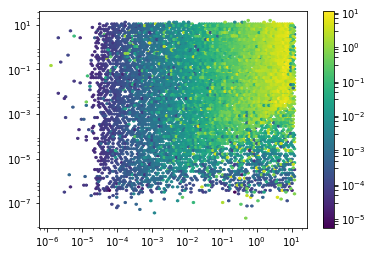

In [17]:
from matplotlib.colors import LogNorm
plt.hexbin(np.sqrt(df[1,1]**2+df[1,2]**2+df[1,3]**2),\
           np.sqrt(df[2,1]**2+df[2,2]**2+df[2,3]**2),\
           np.sqrt(df[3,1]**2+df[3,2]**2+df[3,3]**2),xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

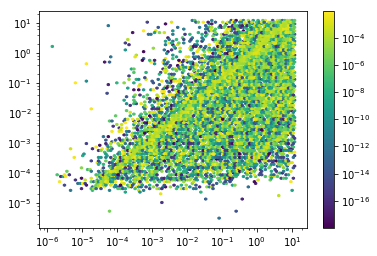

In [18]:
from matplotlib.colors import LogNorm
plt.hexbin(np.sqrt(df[1,1]**2+df[1,2]**2+df[1,3]**2),\
           np.sqrt(df[3,1]**2+df[3,2]**2+df[3,3]**2),\
           np.abs(df.m1)*1E9,xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

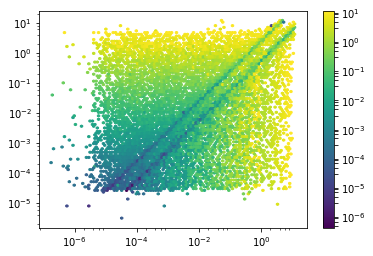

In [19]:
plt.hexbin(np.abs(df.f12),np.abs(df.f13),np.abs(df.f23),xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

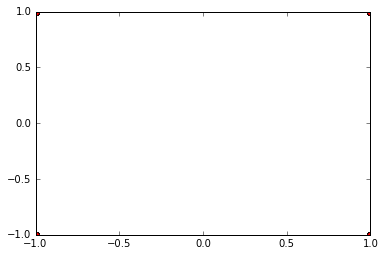

In [713]:
plt.plot(df.sgnm2,df.sgnml,'ro')

Check possible input parameters that could be zero.
Input: [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:

In [714]:
for i in range(1,4):
    for j in range(1,4):
        print i,j,df[i,j].abs().min()

1 1 1.03581697771e-06
1 2 1.00461363958e-16
1 3 1.00173857986e-16
2 1 1.0026446155e-16
2 2 0.0
2 3 1.00030301824e-16
3 1 3.4015643421e-08
3 2 1.00307252779e-16
3 3 1.00045008245e-16


In [715]:
(2,2)<(2,1)

False

In [716]:
xx=df[[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3),'f12','f13','f23']]

xx=xx.apply(np.abs)

gap=[]
vmax=[]
vmin=[]
for i in xx.index:
    vmax.append(xx.loc[i].max())
    vmin.append(xx.loc[i].min())
    gap.append(np.log10(xx.loc[i].max())-np.log10(xx.loc[i].min()))

df['gap']=gap
df['max']=vmax
df['min']=vmin

In [717]:
print df['max'].min(),df['min'].max(),df.gap.min()

0.0171657106463 2.01676126284e-05 4.70475673356


In [718]:
df[df['max']==df['max'].min()][[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3),'f12','f13','f23']]

,"(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(3, 2)","(3, 3)",f12,f13,f23
486,-0.000113,4.944596e-10,-3.424693e-07,-2.039121e-10,0.00212,-0.000051,-0.016192,0.000174,-5.256033e-07,-0.00714,-0.017166,0.001434


In [719]:
df[df['gap']==df['gap'].min()][[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3),'f12','f13','f23']]

,"(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(3, 2)","(3, 3)",f12,f13,f23
8559,0.828845,-0.00002,0.000021,0.003088,-0.002189,0.000723,1.021907,-0.000074,0.000044,0.00067,0.000321,-0.000101


In [728]:
df[df['max']<df['max'].min()*2][[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3),'f12','f13','f23','max','gap'\
                                ]].sort_values('max').reset_index(drop=True)

,"(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(3, 2)","(3, 3)",f12,f13,f23,max,gap
0,-0.000113,4.944596e-10,-3.424693e-07,-2.039121e-10,2.119712e-03,-5.148825e-05,-0.016192,1.743387e-04,-5.256033e-07,-0.007140,-0.017166,0.001434,0.017166,7.925219
1,-0.012751,-1.305608e-05,-3.602556e-10,-2.280998e-07,3.850353e-03,-9.659532e-05,-0.018273,7.177736e-10,9.701010e-14,0.007563,0.018040,-0.000764,0.018273,11.274993
2,0.015328,-1.244142e-05,8.629134e-15,1.630580e-12,-5.933697e-04,1.842289e-05,-0.018280,-1.880361e-13,7.879493e-06,0.007944,0.018032,0.004007,0.018280,12.326016
3,0.012384,5.644196e-12,3.109142e-07,1.894284e-12,-9.699903e-04,2.423540e-05,0.017884,4.499987e-13,4.518590e-12,0.007553,0.018435,-0.003048,0.018435,10.612443
4,-0.018494,-1.709513e-04,3.834917e-06,-1.970227e-12,1.038016e-03,-2.590803e-05,-0.018548,-2.678035e-14,-3.247575e-12,0.007283,0.017772,-0.002849,0.018548,11.840484
5,-0.012214,2.881651e-07,-3.199020e-07,2.051427e-12,1.576759e-03,-3.946940e-05,-0.017535,5.105825e-13,-2.683390e-08,-0.007795,-0.018798,0.001870,0.018798,10.566054
6,0.012896,1.343307e-05,-8.608841e-13,1.103398e-09,-1.104989e-02,2.775162e-04,0.018877,1.789384e-08,-5.818544e-08,0.007359,0.017462,-0.000266,0.018877,10.341000
7,-0.013542,-1.385575e-05,-1.822368e-11,-3.534397e-03,9.599042e-04,-2.402136e-05,-0.018937,4.125406e-08,2.175291e-09,0.007134,0.017406,-0.002771,0.018937,9.016669
8,-0.013287,5.867903e-08,-3.391787e-07,-1.304926e-11,1.705586e-03,-4.270605e-05,-0.018975,-1.803327e-06,-1.052774e-08,-0.007218,-0.017406,0.001729,0.018975,9.162604
9,-0.010543,-1.113588e-12,-3.090232e-07,9.127852e-08,3.006008e-03,-7.520788e-05,-0.017329,-2.183980e-08,4.149088e-07,0.007962,0.019023,-0.000982,0.019023,10.232551


In [ ]:
df[df['gap']<df['gap'].min()*1.2][[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3),'f12','f13','f23','max','gap']]

## Zeros

In [664]:
for i in [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:
    for j in [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:
        for k  in [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:
            if i!=j and i!=k and j!=k:
                if i<j and j<k:
                    print i,j,k,df[np.logical_and( np.logical_and( df[i].abs()<1E-15,df[j].abs()<1E-15,  ),df[k].abs()<1E-15  )].shape

(1, 2) (1, 3) (2, 1) (0, 24)
(1, 2) (1, 3) (2, 3) (0, 24)
(1, 2) (1, 3) (3, 2) (0, 24)
(1, 2) (1, 3) (3, 3) (0, 24)
(1, 2) (2, 1) (2, 3) (0, 24)
(1, 2) (2, 1) (3, 2) (5, 24)
(1, 2) (2, 1) (3, 3) (4, 24)
(1, 2) (2, 3) (3, 2) (3, 24)
(1, 2) (2, 3) (3, 3) (0, 24)
(1, 2) (3, 2) (3, 3) (5, 24)
(1, 3) (2, 1) (2, 3) (0, 24)
(1, 3) (2, 1) (3, 2) (3, 24)
(1, 3) (2, 1) (3, 3) (5, 24)
(1, 3) (2, 3) (3, 2) (0, 24)
(1, 3) (2, 3) (3, 3) (0, 24)
(1, 3) (3, 2) (3, 3) (4, 24)
(2, 1) (2, 3) (3, 2) (0, 24)
(2, 1) (2, 3) (3, 3) (0, 24)
(2, 1) (3, 2) (3, 3) (10, 24)
(2, 3) (3, 2) (3, 3) (2, 24)


In [691]:
def check_real(x):
    ab=np.unique(np.isnan(x)) #np.unique( np.equal( np.imag(x),np.zeros(x.shape) ) )
    chr=False
    #if ab.shape[0]==1 and ab[0]:
    if ab.shape[0]==1 and not ab[0]:
        chr=True
    return chr

def rndm_sgn():
    return np.random.choice([1,-1])

df=pd.DataFrame()
npoints=300000
omin=1E-16;omax=12
m1min=1E-27;m1max=1E-11
for i in range(npoints):
    O=pd.Series({'s2phi':0.014,'M1':200,'M2':300,'m1':0,(1,2):1e-3,(1,3):1e-6,(2,1):200e-3,(2,3):0,(3,2):-1e-5,(3,3):0})
    for ij in [(1,2),(1,3),(2,1),(2,3),(3,2),(3,3)]:
        O[ij]=rndm_sgn()*np.exp(np.random.uniform(np.log(omin),np.log(omax)))
    
    #O[1,2]=0 #does not work
    O[1, 3]=0
    O[2, 1]=0
    O[3, 2]=0
    #O[3, 3]=0
    O.m1=rndm_sgn()*np.exp(np.random.uniform(np.log(m1min),np.log(m1max))) #in GeV
    kappa=Kappa(O.s2phi,O.M1,O.M2)
    O['kappa']=kappa
    sgnm2=rndm_sgn()
    sgnml=rndm_sgn()
    X=Inverse_Zee_Matrix(kappa,O.m1,sgnm2=sgnm2,sgnml=sgnml)
    Q,f=get_yukawas(X,q01=O[1,2],q02=O[1,3],q10=O[2,1],q12=O[2,3],q21=O[3,2],q22=O[3,3])
    if check_real(Q) and check_real(f) and np.abs(np.append(Q,f)).max()<=omax:
        O=O.append(pd.Series({(1,1):Q[0,0],(2,2):Q[1,1],(3,1):Q[2,0],'f12':f[0,1],'f13':f[0,2],'f23':f[1,2],\
                            'sgnm2':sgnm2,'sgnml':sgnml,'Q':Q,'f':f}))
        df=df.append(O,ignore_index=True)

In [729]:
RECOVER_SCAN=True
df=pd.read_excel('zee_zeros.xlsx')

In [730]:
df.shape

(19135, 24)

In [731]:
if RECOVER_SCAN:
    for i in range(1,4):
        for j in range(1,4):
            df=df.rename_axis({'(%d, %d)' %(i,j):(i,j)},axis='columns')

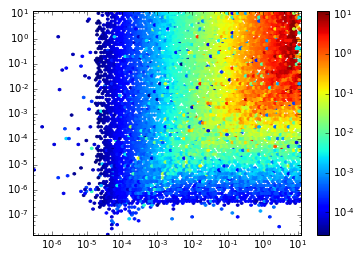

In [732]:
from matplotlib.colors import LogNorm
plt.hexbin(np.sqrt(df[1,1]**2+df[1,2]**2+df[1,3]**2),\
           np.sqrt(df[2,1]**2+df[2,2]**2+df[2,3]**2),\
           np.sqrt(df[3,1]**2+df[3,2]**2+df[3,3]**2),xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

When the `0` are big, the fij  are small:

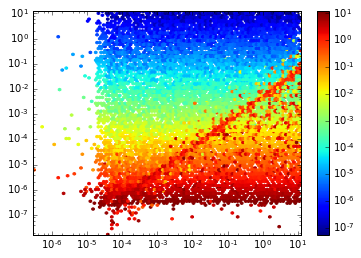

In [733]:
plt.hexbin(np.sqrt(df[1,1]**2+df[1,2]**2+df[1,3]**2),\
           np.sqrt(df[2,1]**2+df[2,2]**2+df[2,3]**2),\
           df.f23.abs(),xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

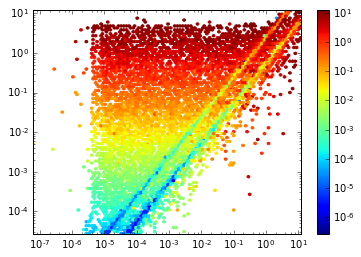

In [734]:
plt.hexbin(np.abs(df.f12),np.abs(df.f13),np.abs(df.f23),xscale='log',yscale='log',norm=LogNorm())
plt.colorbar()

In [735]:
xx=df[[(1,1),(1,2),(2,2),(2,3),(3,1),(3,3),'f12','f13','f23']] #whithout zeros

xx=xx.apply(np.abs)

gap=[]
vmax=[]
vmin=[]
for i in xx.index:
    vmax.append(xx.loc[i].max())
    vmin.append(xx.loc[i].min())
    gap.append(np.log10(xx.loc[i].max())-np.log10(xx.loc[i].min()))

df['gap']=gap

df['max']=vmax

df['min']=vmin

In [736]:
df['max'].min(),df['min'].max(),df.gap.min()

(0.0181625720716828, 0.00025063514675624298, 3.3227531171113167)

The quality of the solution is better.

In [737]:
df[df['gap']<df['gap'].min()*1.2][[(1,1),(1,2),(2,2),(2,3),(3,1),(3,3),'f12','f13','f23','max','gap'\
                                  ]].sort_values('max').reset_index(drop=True)

,"(1, 1)","(1, 2)","(2, 2)","(2, 3)","(3, 1)","(3, 3)",f12,f13,f23,max,gap
0,0.010022,-0.000012,-0.001511,0.000041,-0.017338,0.000006,0.008181,0.019012,0.001810,0.019012,3.482310
1,0.000374,-0.000013,0.000232,-0.000004,-0.015388,0.000004,0.007590,0.021422,-0.018222,0.021422,3.748029
2,-0.007664,-0.000016,0.001659,-0.000041,-0.021990,0.000002,0.006190,0.014990,-0.001822,0.021990,3.983395
3,0.005386,0.000015,0.000802,-0.000021,0.022164,-0.000003,0.006562,0.014873,0.003434,0.022164,3.922059
4,-0.003914,0.000010,0.002029,-0.000053,0.014724,-0.000004,0.009586,0.022390,0.001396,0.022390,3.745955
5,-0.021582,-0.000004,-0.000168,0.000006,-0.017984,-0.000003,-0.024019,-0.018329,-0.012631,0.024019,3.933647
6,0.024083,-0.000011,0.005314,-0.000129,-0.015385,0.000010,0.009023,0.021429,-0.000571,0.024083,3.381427
7,0.008569,-0.000006,-0.000034,0.000007,-0.024111,0.000007,-0.016671,-0.013672,-0.011032,0.024111,3.609359
8,0.004546,-0.000004,-0.000134,0.000016,-0.020825,0.000005,-0.025620,-0.015829,-0.004588,0.025620,3.822158
9,-0.020119,-0.000012,-0.000153,0.000003,-0.021655,-0.000003,0.008041,0.015222,0.025915,0.025915,3.978386


In [702]:
#df.to_excel('zee_zeros.xlsx')